In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt("Simple_Data_Linear_Regression.csv",delimiter=",") #if locally saved
# otherwise download https://github.com/Alex-ley/Machine_learning_articles/blob/Part-2/Simple_Data_Linear_Regression.csv
# or use directly https://raw.githubusercontent.com/Alex-ley/Machine_learning_articles/Part-2/Simple_Data_Linear_Regression.csv
iterations = 500
learning_rate = 0.05
initial_m = 0
initial_b = 0

In [3]:
data

array([[ 1. ,  4. ],
       [ 1.2,  5.5],
       [ 2. ,  6. ],
       [ 2.1,  7. ],
       [ 2.5,  8.5],
       [ 3.1,  7.2],
       [ 3.5,  9. ],
       [ 4. , 11.4],
       [ 4.2, 11. ],
       [ 4.6, 12.5],
       [ 5. , 13. ]])

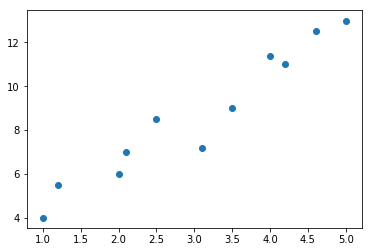

In [4]:
X_act = data[:,0]
Y_act = data[:,1]
plt.scatter(x=X_act,y=Y_act)

In [5]:
def computeCostAndDerivatives(X_act,Y_act,m,b):
    cost = 0
    m_deriv = 0
    b_deriv = 0
    for i in range(len(X_act)):
        loss = Y_act[i] - (X_act[i]*m + b)
        cost += loss**2
        m_deriv += X_act[i]*loss
        b_deriv += loss
        
    avg_cost = round(cost / len(X_act),5)
    m_deriv = (m_deriv * -2) / len(X_act)
    b_deriv = (b_deriv * -2) / len(X_act)
    return avg_cost, m_deriv, b_deriv

In [6]:
avg_cost, m_deriv, b_deriv = computeCostAndDerivatives(X_act,Y_act,initial_m,initial_b)

In [7]:
avg_cost, m_deriv, b_deriv

(82.95909, -59.39454545454546, -17.29090909090909)

In [8]:
def gradientDescent(X_act,Y_act,m,b,iterations,learning_rate):
    avg_cost_array = []
    for i in range(iterations):
        avg_cost, m_deriv, b_deriv = computeCostAndDerivatives(X_act,Y_act,m,b)
        avg_cost_array.append(avg_cost)
        m -= m_deriv * learning_rate
        b -= b_deriv * learning_rate
    return avg_cost, m, b, avg_cost_array

In [9]:
avg_cost, m, b, avg_cost_array = gradientDescent(X_act,Y_act,initial_m,initial_b,iterations,learning_rate)

In [10]:
print(f"after {iterations} iterations, the avg_cost={avg_cost} m={m} b={b}")

after 500 iterations, the avg_cost=0.51679 m=2.13652783302896 b=2.196879745806536


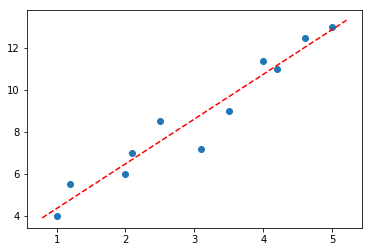

In [11]:
plt.scatter(X_act, Y_act)
axes = plt.gca()
x_vals = np.array(axes.get_xlim()) 
y_vals = m* x_vals + b
plt.plot(x_vals, y_vals, 'r--')

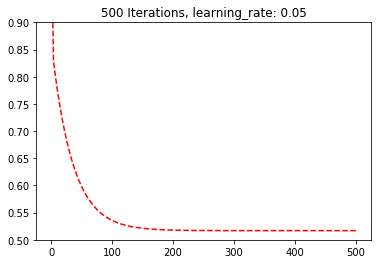

In [12]:
epochs = np.array(np.linspace(1,iterations,num=iterations)).reshape(-1,1)
y_axis_cost = np.array(avg_cost_array,dtype='object').reshape(-1,1) #dtype= np.longdouble np.float64 etc.
plt.title(f"500 Iterations, learning_rate: {learning_rate}")
plt.ylim((0.5,0.90))
plt.plot(epochs, y_axis_cost , 'r--')

In [13]:
iterations = 500
slow_learning_rate = 0.005
initial_m = 0
initial_b = 0
avg_cost, m, b, slow_avg_cost_array =gradientDescent(X_act,Y_act,initial_m,initial_b,iterations,slow_learning_rate)

In [14]:
print(f"after {iterations} iterations, the avg_cost={avg_cost} m={m} b={b}")

after 500 iterations, the avg_cost=0.59684 m=2.338671261566973 b=1.4834876074737449


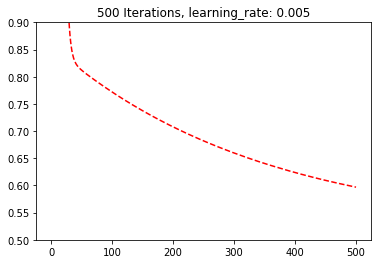

In [15]:
y_axis_cost = np.array(slow_avg_cost_array,dtype='object').reshape(-1,1)
plt.title(f"500 Iterations, learning_rate: {slow_learning_rate}")
plt.ylim((0.5,0.90))
plt.plot(epochs, y_axis_cost, 'r--')

In [16]:
iterations = 500
fast_learning_rate = 0.085
initial_m = 0
initial_b = 0
avg_cost, m, b, fast_avg_cost_array = gradientDescent(X_act,Y_act,initial_m,initial_b,iterations,fast_learning_rate)

In [17]:
print(f"after {iterations} iterations, the avg_cost={avg_cost} m={m} b={b}")

after 500 iterations, the avg_cost=0.51679 m=2.1360899299056544 b=2.197833940981964


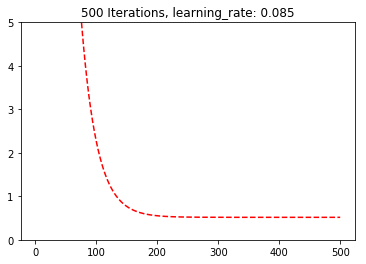

In [18]:
y_axis_cost = np.array(fast_avg_cost_array,dtype=np.float64).reshape(-1,1)
plt.title(f"500 Iterations, learning_rate: {fast_learning_rate}")
plt.ylim((0,5))
plt.plot(epochs, y_axis_cost, 'r--')

In [22]:
iterations = 500
too_fast_learning_rate = 0.1
initial_m = 0
initial_b = 0
avg_cost, m, b, too_fast_avg_cost_array = gradientDescent(X_act,Y_act,initial_m,initial_b,iterations,too_fast_learning_rate)

In [23]:
print(f"after {iterations} iterations, the avg_cost={avg_cost} m={m} b={b}")

after 500 iterations, the avg_cost=4.181682838849052e+125 m=-2.424754604758981e+62 b=-6.870670180285428e+61


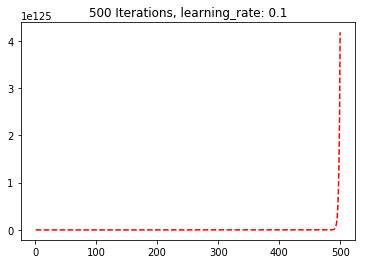

In [30]:
y_axis_cost = np.array(too_fast_avg_cost_array,dtype=np.float64).reshape(-1,1)
plt.title(f"500 Iterations, learning_rate: {too_fast_learning_rate}")
# plt.ylim((0,1e124))
plt.plot(epochs, y_axis_cost, 'r--')